In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud


import nltk.corpus
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [63]:
data = pd.read_csv('Dataset-SA.csv.zip')
data['sentiment_code'] = pd.Categorical(data.Sentiment).codes
data['sentiment_code'] = data['sentiment_code'].astype('Int64')
data.dropna(inplace = True)

In [64]:
data.product_price.unique()

array(['3999', '8999', '7999', '9999', '1199', '499', '1999', '1099',
       '997', '1499', '435', '1349', '30999', '13999', '9990', '14299',
       '5298', '7599', '11999', '329', '425', '249', '302', '59', '245',
       '79', '349', '449', '340', '299', '469', '26990', '23479', '29390',
       '29990', '20990', '44490', '25990', '38490', '42000', '44890',
       '31590', '41990', '52990', '33990', '18990', '50999', '45550',
       '1401', '359', '1453', '254', '205', '1256', '1547', '195', '575',
       '366', '209', '219', '549', '859', '210', '215', '1142', '235',
       '221', '1599', '2454', '6099', '2399', '599', '849', '699',
       'pigeon favourite electric kettle15 l silver black', '4449',
       '4098', '5599', '5499', '1448', '3569', '2879', '1799', '1329',
       '5390', '11500', '1220', '9050', '6505', '6495', '11595', '7649',
       '4399', '6029', '6299', '5919', '6390', '2695', '2949', '7909',
       '4499', '6525', '6589', '5039', '4219', '4319', '7499', '379',
     

In [65]:
data['product_price'] = pd.to_numeric(data['product_price'], errors='coerce')
data.dropna(inplace = True)
data['product_price'].describe()

,product_price
count,180376.000000
mean,4620.764104
std,10439.043652
min,59.000000
25%,350.000000
50%,980.000000
75%,3569.000000
max,86990.000000


In [66]:
data['price_category'] = pd.cut(data.product_price, bins = [0, 10000, 50000, 100000], labels = ['low_spend', 'medium_spend', 'high_spend'])

[Text(0.5, 1.0, 'Sentiment counts per product price category')]

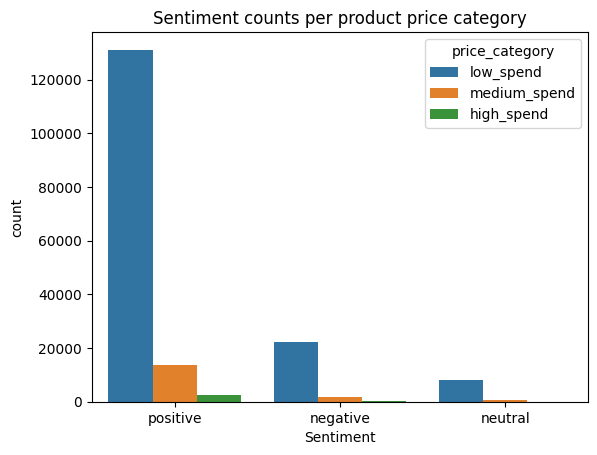

In [67]:
# Sentiment counts per product price category

sns.countplot(data = data, x = 'Sentiment', hue = 'price_category').set(title='Sentiment counts per product price category')

# Medium spend category has majority positive reviews

In [68]:
# Pre-processing and cleaning text

stop = stopwords.words('english')
add_stopwords = ['aqua', 'black', 'blue', 'fuchsia', 'gray', 'green', 'lime', 'maroon', 'navy', 'olive', 'purple', 'red', 'silver', 'teal', 'white', 'yellow', 'pack', 'light', 'product']
stop.extend(add_stopwords)

lemmatizer = WordNetLemmatizer()


def clean_text(text):

  text = text.lower()
  text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text) # Punctuations, URLs and @
  text = " ".join([word for word in text.split() if word not in (stop)]) # Stopwords
  text = " ".join([lemmatizer.lemmatize(word) for word in text.split()]) # Stemming

  return(text)

In [69]:
data_sub = data[['product_name', 'Summary']].copy(deep = True)
data_sub = data_sub.applymap(clean_text)
data_sub

<ipython-input-69-b894d4d81bf8>:2: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.



,product_name,Summary
0,candes 12 l roompersonal air coolerwhite elega...,great cooler excellent air flow price amazing ...
1,candes 12 l roompersonal air coolerwhite elega...,best budget 2 fit cooler nice cooling
2,candes 12 l roompersonal air coolerwhite elega...,quality good power air decent
3,candes 12 l roompersonal air coolerwhite elega...,bad fan
4,candes 12 l roompersonal air coolerwhite elega...,ok ok
...,...,...
205047,cello 18 opalware cello dazzle lush fiesta opa...,good
205048,cello 18 opalware cello dazzle lush fiesta opa...,nice
205049,cello 18 opalware cello dazzle lush fiesta opa...,nice fast delivery
205050,cello 18 opalware cello dazzle lush fiesta opa...,awesome


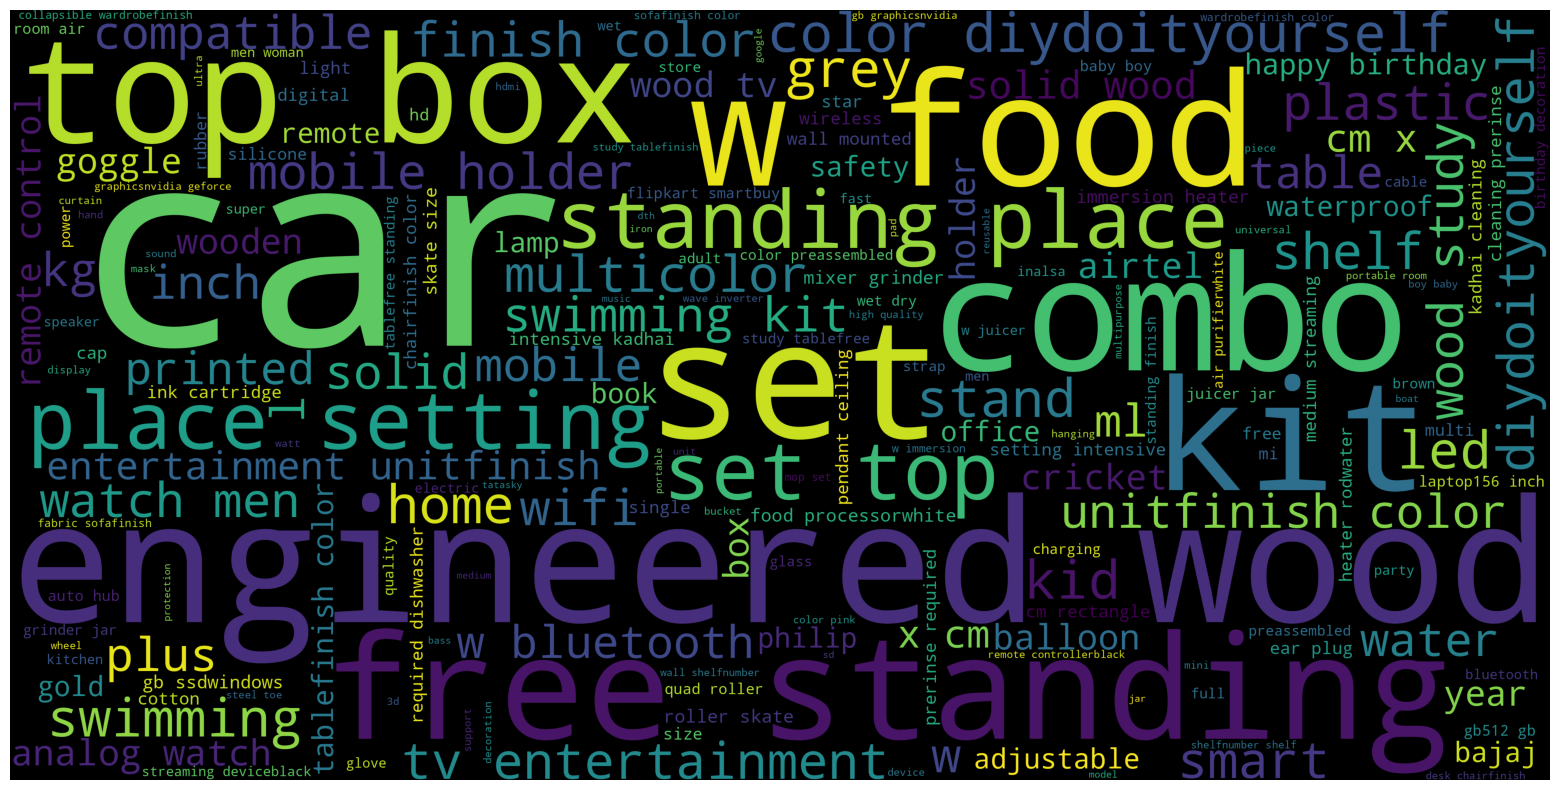

In [70]:
# Wordcloud Product Names

wordcloud_product = WordCloud(width=4000, height=2000).generate(' '.join(data_sub['product_name'].unique()))
# Generate plot
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_product)
plt.axis("off")
plt.show()

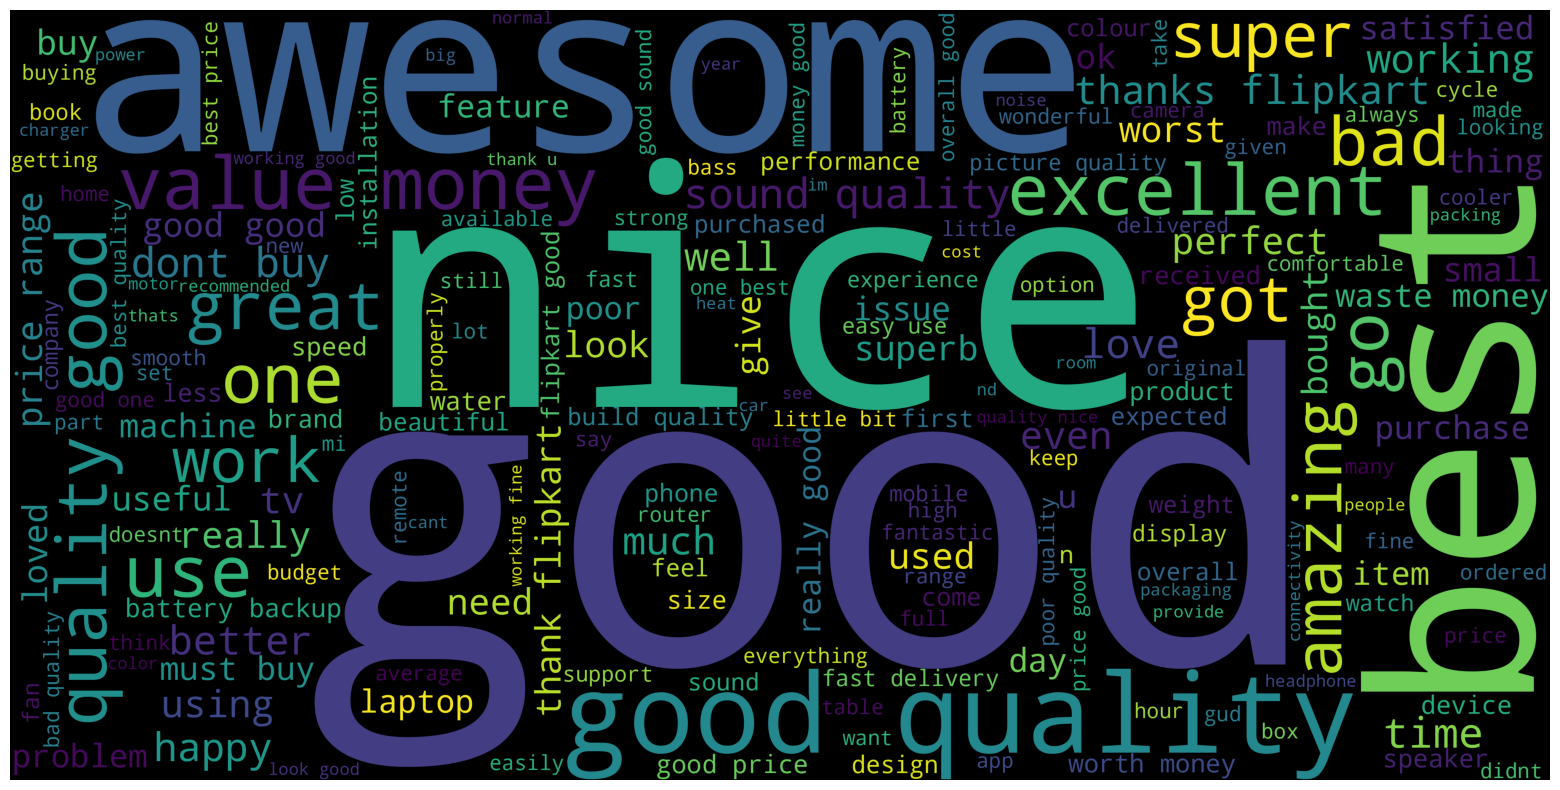

In [71]:
# Wordcloud Summary

wordcloud_summary = WordCloud(width=4000, height=2000).generate(' '.join(data_sub['Summary'].unique()))
# Generate plot
plt.figure(figsize=(20,10))
plt.imshow(wordcloud_summary)
plt.axis("off")
plt.show()

In [72]:
pip install datasets transformers

In [73]:
import pandas as pd
import numpy as np
import ast
import spacy
from spacy import displacy
from datasets import load_dataset, Dataset
import plotly.express as px
import torch
from transformers import AutoTokenizer, DataCollatorWithPadding, AutoModelForSequenceClassification, TrainingArguments, Trainer
#from datasets import load_metric
import datasets

In [74]:
# Read data

data = pd.read_csv('Dataset-SA.csv.zip')

# Convert sentiments to category and drop NA value rows

data['sentiment_code'] = pd.Categorical(data.Sentiment).codes
data['sentiment_code'] = data['sentiment_code'].astype('Int64')
data.dropna(inplace = True)

# Convert data into Dataset object for using with distilBERT

data_2 = Dataset.from_pandas(data[['Summary', 'sentiment_code']])

In [75]:

data.head()

,product_name,product_price,Rate,Review,Summary,Sentiment,sentiment_code
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive,2
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive,2
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive,2
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative,0
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral,1


In [76]:
len(data)

180379

In [77]:
data.Sentiment.value_counts()

,count
Sentiment,
positive,147171
negative,24401
neutral,8807


In [78]:
data.Summary[0]

'great cooler excellent air flow and for this price its so amazing and unbelievablejust love it'

In [79]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

X = data['Summary']
y = data['sentiment_code']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf = TfidfVectorizer()
logreg = LogisticRegression()

model = Pipeline([('tfidf', tfidf), ('logreg', logreg)])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9343885131389289
              precision    recall  f1-score   support

         0.0       0.85      0.84      0.84      4877
         1.0       0.73      0.41      0.52      1695
         2.0       0.95      0.98      0.97     29504

    accuracy                           0.93     36076
   macro avg       0.84      0.74      0.78     36076
weighted avg       0.93      0.93      0.93     36076



In [80]:
# Train-Test data split

# train = data_2.shuffle(seed=42).select([i for i in list(range(20000))])
# test = data_2.shuffle(seed=42).select([i for i in list(range(20000, len(data_2)))])


# print(train[0])
# print(test[0])
data = pd.read_csv('Dataset-SA.csv.zip')
total_product=len(data['product_name'])   #total product using
total_ratings=len(data['Rate']!='No rating available' ) # total rating product
top_ratings=len(data[data['Rate']=='5'])  #5 star rating
data_funnel_1 = dict(
    number=[total_product,total_ratings,top_ratings],
    stage=["Total products","products with ratings","products with 5 star rating"])
funnel_1_fig = px.funnel(data_funnel_1,x='number',y='stage')
funnel_1_fig.show()

In [81]:
data.isnull().sum()

,0
product_name,0
product_price,0
Rate,0
Review,24664
Summary,11
Sentiment,0


In [82]:
# scatter plot

#rating_5=pd.DataFrame(data.loc[data['Rate']=='5'])
#top_product_type=rating_5['product_price'].value_counts() #top products

#df_top_product=pd.DataFrame(top_product_type[:5].reset_index())
#df_top_product.rename(columns={'index':'top_product'},inplace=True)
#df_top_product.drop('product_price',inplace=True,axis=1)

#df_product_brand_rate5=pd.concat([df_top_product],axis=1)

In [83]:
total_product=len(data['product_name'])   #total product using
total_ratings=len(data['Rate']!='No rating available' ) # total rating product
top_ratings=len(data[data['Rate']=='4'])  #5 star rating
data_funnel_1 = dict(
    number=[total_product,total_ratings,top_ratings],
    stage=["Total products","products with ratings","products with 4 star rating"])
funnel_1_fig = px.funnel(data_funnel_1,x='number',y='stage')
funnel_1_fig.show()

In [84]:
total_product=len(data['product_name'])   #total product using
total_ratings=len(data['Rate']!='No rating available' ) # total rating product
top_ratings=len(data[data['Rate']=='3'])  #5 star rating
data_funnel_1 = dict(
    number=[total_product,total_ratings,top_ratings],
    stage=["Total products","products with ratings","products with 3 star rating"])
funnel_1_fig = px.funnel(data_funnel_1,x='number',y='stage')
funnel_1_fig.show()

In [85]:
total_product=len(data['product_name'])   #total product using
total_ratings=len(data['Rate']!='No rating available' ) # total rating product
top_ratings=len(data[data['Rate']=='2'])  #5 star rating
data_funnel_1 = dict(
    number=[total_product,total_ratings,top_ratings],
    stage=["Total products","products with ratings","products with 2 star rating"])
funnel_1_fig = px.funnel(data_funnel_1,x='number',y='stage')
funnel_1_fig.show()

In [86]:
total_product=len(data['product_name'])   #total product using
total_ratings=len(data['Rate']!='No rating available' ) # total rating product
top_ratings=len(data[data['Rate']=='1'])  #5 star rating
data_funnel_1 = dict(
    number=[total_product,total_ratings,top_ratings],
    stage=["Total products","products with ratings","products with 1 star rating"])
funnel_1_fig = px.funnel(data_funnel_1,x='number',y='stage')
funnel_1_fig.show()

In [87]:
#total_product=len(data['product_name'])   #total product using
#total_ratings=len(data['Rate']!='No rating available' ) # total rating product
#top_ratings=len(data[data['Rate']=='0'])  #5 star rating
#data_funnel_1 = dict(
    #number=[total_product,total_ratings,top_ratings],
    #stage=["Total products","products with ratings","products with 0 star rating"])
#funnel_1_fig = px.funnel(data_funnel_1,x='number',y='stage')
#funnel_1_fig.show()

In [88]:
# print(data.columns)

In [89]:
# print(data.head())

In [90]:
# print(data['sentiment_code'].isnull().sum())

In [91]:
# from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import Pipeline

# X = data['Summary']
# y = data['sentiment_code']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# tfidf = TfidfVectorizer()
# logreg = LogisticRegression()

# model = Pipeline([('tfidf', tfidf), ('logreg', logreg)])

# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# print('Accuracy:', accuracy_score(y_test, y_pred))
# print(classification_report(y_test, y_pred))